In [1]:
from sqlalchemy import create_engine
import pandas as pd

# Set your database parameters
database_username = 'postgres'
database_password = 'postgres'  # Your password
database_ip       = 'localhost'
database_name     = 'PH_EmployeeDB'  # Your database name

# Create the connection string
connection_string = f'postgresql://{database_username}:{database_password}@{database_ip}/{database_name}'

# Create the connection engine
engine = create_engine(connection_string)

In [4]:
# For the personal_info table
query_employees = 'SELECT * FROM employees;'
df_employees = pd.read_sql(query_employees, engine)
print(df_employees.head())

   emp_no emp_title_id  birth_date  first_name  last_name sex   hire_date
0  473302        s0001  1953-07-25    Hideyuki   Zallocco   M  1990-04-28
1  475053        e0002  1954-11-18       Byong  Delgrande   F  1991-09-07
2   57444        e0002  1958-01-30       Berry       Babb   F  1992-03-21
3  421786        s0001  1957-09-28       Xiong   Verhoeff   M  1987-11-26
4  282238        e0003  1952-10-28  Abdelkader    Baumann   F  1991-01-18


In [5]:
# Retrieving data from the 'titles' and 'salaries' tables
query_titles = 'SELECT * FROM titles;'
df_titles = pd.read_sql(query_titles, engine)

query_salaries = 'SELECT * FROM salaries;'
df_salaries = pd.read_sql(query_salaries, engine)

# Merging the dataframes
df_merged = pd.merge(df_employees, df_titles, left_on='emp_title_id', right_on='title_id')
df_merged = pd.merge(df_merged, df_salaries, on='emp_no')

# Grouping by title and calculating salary statistics
salary_stats = df_merged.groupby('title').agg({'salary': ['min', 'max', 'mean']}).reset_index()
salary_stats.columns = ['Title', 'Min Salary', 'Max Salary', 'Average Salary']
print(salary_stats)


                Title  Min Salary  Max Salary  Average Salary
0  Assistant Engineer       40000       99683    48564.434447
1            Engineer       40000      100683    48535.336511
2             Manager       40000       72446    51531.041667
3     Senior Engineer       40000      110449    48506.799871
4        Senior Staff       40000      127238    58550.172704
5               Staff       40000      129492    58465.382850
6    Technique Leader       40000      104065    48582.896092


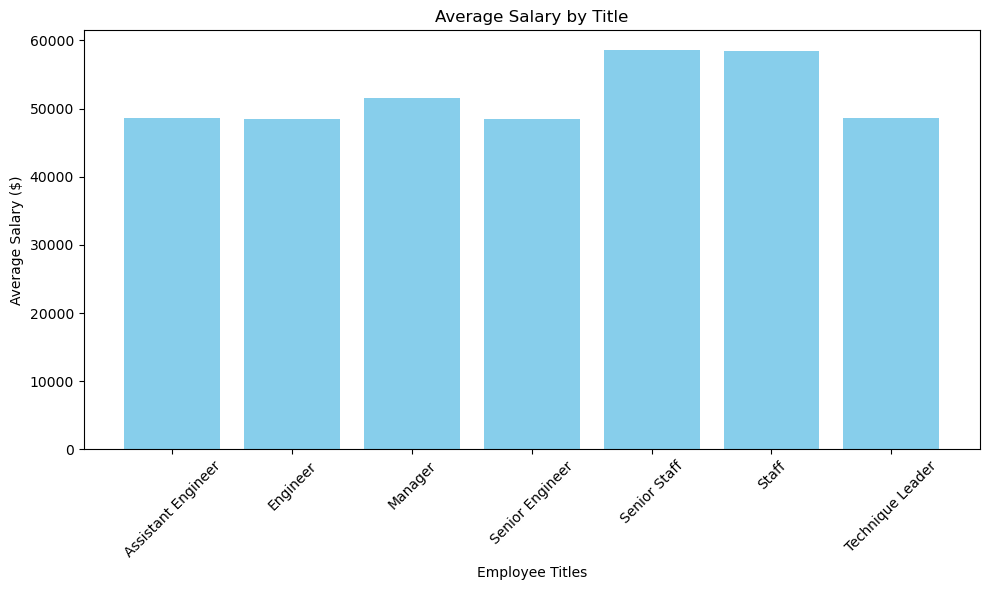

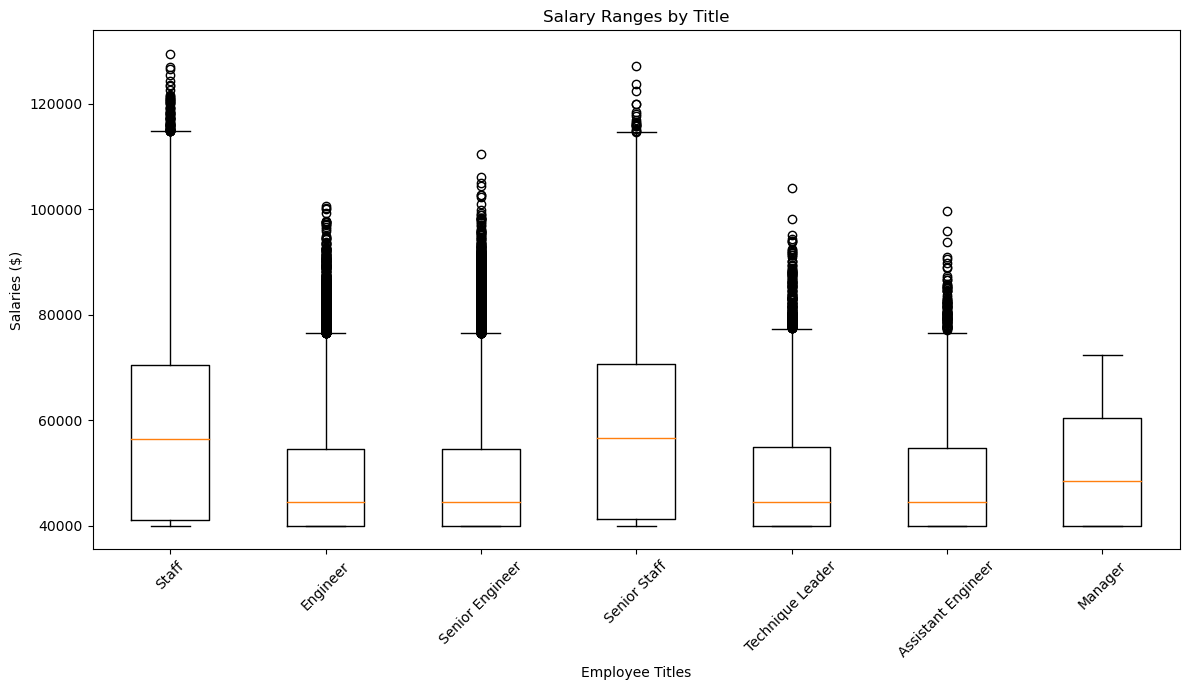

In [6]:
import matplotlib.pyplot as plt

# Creating a bar chart for average salary by title
plt.figure(figsize=(10,6))
plt.bar(salary_stats['Title'], salary_stats['Average Salary'], color='skyblue')
plt.xlabel('Employee Titles')
plt.ylabel('Average Salary ($)')
plt.title('Average Salary by Title')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Creating box plots for salary ranges within each title
plt.figure(figsize=(12,7))
df_merged['salary'] = df_merged['salary'].astype(float) # ensuring the salary column is float type
plt.boxplot([df_merged.loc[df_merged['title'] == title, 'salary'] for title in df_merged['title'].unique()],
            labels=df_merged['title'].unique())
plt.xlabel('Employee Titles')
plt.ylabel('Salaries ($)')
plt.title('Salary Ranges by Title')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
